In [1]:
#1.Loading and Preprocessing
from sklearn.datasets import load_iris
import pandas as pd
#Loading the iris dataset
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


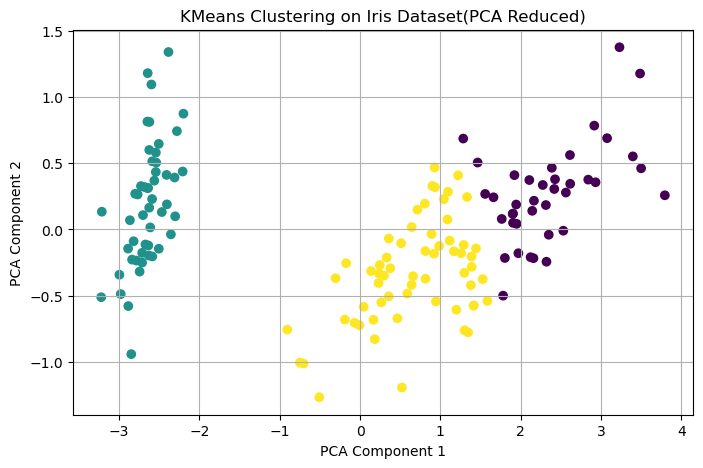

In [3]:
#2
#A)KMeans Clustering
#KMeans partitions data into k clusters by minimizing within-cluster variance
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Applying kmeans:
kmeans=KMeans(n_clusters=3,random_state=42)
df['KMeans_Cluster']=kmeans.fit_predict(df)
#Reducing dimensionality for plotting
pca=PCA(n_components=2)
pca_result=pca.fit_transform(df[iris.feature_names])
# Plotting KMeans clusters
plt.figure(figsize=(8,5))
plt.scatter(pca_result[:,0],pca_result[:,1],c=df['KMeans_Cluster'],cmap='viridis')
plt.title('KMeans Clustering on Iris Dataset(PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

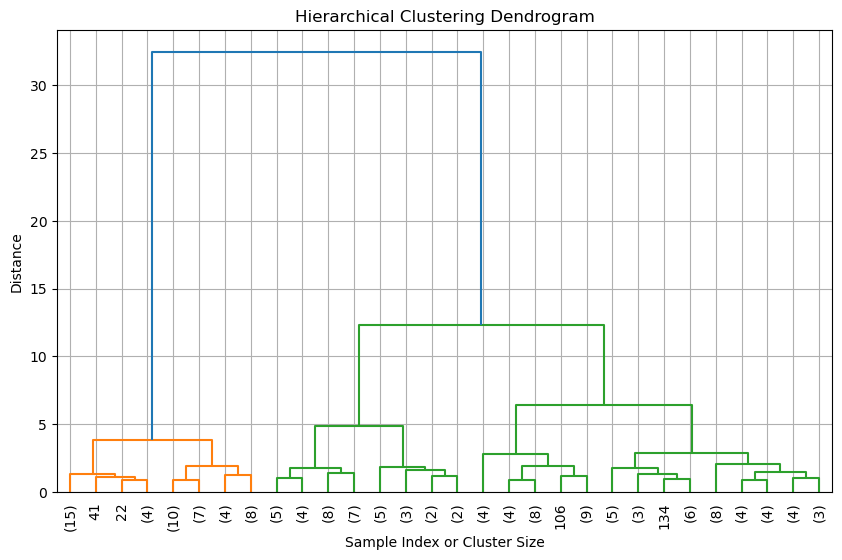

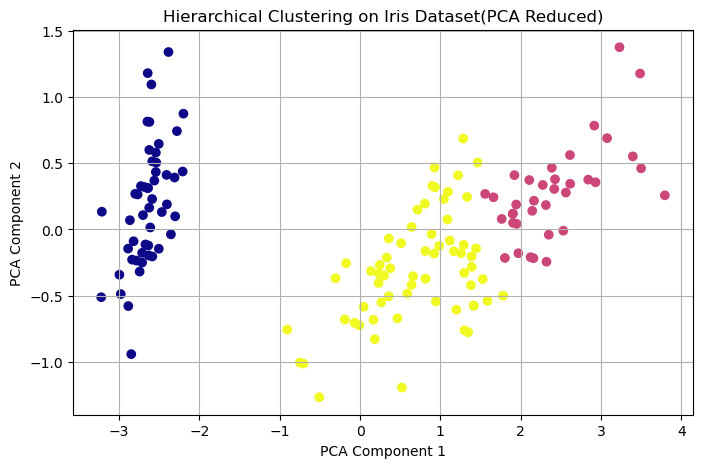

In [14]:
#B)Hierarchical Clustering
#Builds a dendrogram to group similar data points without needing to pre-define number of clusters.
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
#Computing a linkage matrix
linked=linkage(df[iris.feature_names],method='ward')
#Plotting a dendrogram
plt.figure(figsize=(10,6))
dendrogram(linked,truncate_mode='lastp',p=30,leaf_rotation=90,leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid(True)
plt.show()
# Assigning clusters from dendrogram
df['Hierarchical_Cluster']=fcluster(linked,3,criterion='maxclust')
# Plotting hierarchical clusters
plt.figure(figsize=(8,5))
plt.scatter(pca_result[:,0],pca_result[:,1],c=df['Hierarchical_Cluster'],cmap='plasma')
plt.title('Hierarchical Clustering on Iris Dataset(PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()